In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
#manually idenifing train test splits
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

In [3]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(data.shape[1:]))) 
#don't use many LSMT layers as they have a high memory capacity to be trained and no need of adding more
model.add(Dropout(0,2))
model.add(LSTM(units=96,return_sequences=True)) #units not to be same as previous layers, can be assumed differently
model.add(Dropout(0,2))
model.add(LSTM(units=96,return_sequences=True)) 
model.add(Dropout(0,2))
model.add(LSTM(units=96,return_sequences=False)) 
model.add(Dense(1)) #THIS IS A REGRESSION PROBLEM - LINEAR ACTIVATION (no need to mention as activation is by default linear)

model.compile(loss='mse',optimizer='adam') #loss is mean quared error for regression problems

Using TensorFlow backend.
W0111 15:10:39.494910 140671972337472 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0111 15:10:39.517837 140671972337472 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0111 15:10:39.522946 140671972337472 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0111 15:10:40.615652 140671972337472 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.

model.summary()

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 96)                74112     
__________

In [5]:
model.fit(train_data,train_target,epochs=100)

W0111 15:10:41.881468 140671972337472 deprecation.py:323] From /home/chiran/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0111 15:10:45.652950 140671972337472 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0111 15:10:46.028638 140671972337472 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0217
Epoch 2/100
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0018
Epoch 3/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0014
Epoch 4/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0013
Epoch 5/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 6/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 7/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0012
Epoch 8/100
1000/1000 [==============================] - 4s 4ms/step - loss: 9.9060e-04
Epoch 9/100
1000/1000 [==============================] - 4s 4ms/step - loss: 9.4503e-04
Epoch 10/100
1000/1000 [==============================] - 4s 4ms/step - loss: 9.4296e-04
Epoch 11/100
1000/1000 [==============================] - 5s 5ms/step - loss: 8.3284e-04
Epoch 12/100
1000/1000 [==============================] 

1000/1000 [==============================] - 5s 5ms/step - loss: 2.0625e-04
Epoch 94/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.0216e-04
Epoch 95/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3100e-04
Epoch 96/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.7152e-04
Epoch 97/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.6093e-04
Epoch 98/100
1000/1000 [==============================] - 5s 5ms/step - loss: 2.4106e-04
Epoch 99/100
1000/1000 [==============================] - 5s 5ms/step - loss: 3.2098e-04
Epoch 100/100
1000/1000 [==============================] - 4s 4ms/step - loss: 3.0531e-04


In [13]:
result=model.predict(test_data)

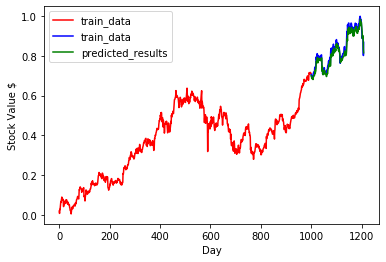

In [14]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='train_data')
plt.plot(np.arange(1000,1209),test_target,'b',label='train_data')
plt.plot(np.arange(1000,1209),result,'g',label='predicted_results')
plt.xlabel('Day')
plt.ylabel('Stock Value $')
plt.legend()
plt.show()

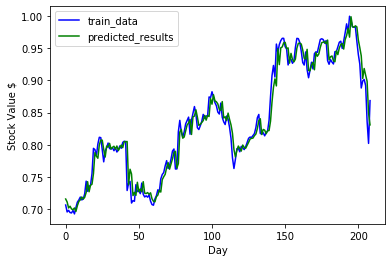

In [18]:

plt.plot(test_target,'b',label='train_data')
plt.plot(result+0.015,'g',label='predicted_results')
plt.xlabel('Day')
plt.ylabel('Stock Value $')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import r2_score

r2= r2_score(test_target,result)
print('R2 score',r2)

R2 score 0.9320018053327246
